# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='C://Users/viren/Desktop/p2_continuous-control/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Report

So far, we have loaded our Unity environment and tested a random agent to ensure that everything works as expected. Now begins the code that will train and use a DDPG agent to solve the problem.

Let us start by importing all the remaining files we need to make this happen. Please note that the line **from ddpg_agent import Agent** uses a modified version of the DDPG code used in the Pendulum project present in Udacity's Github repository for this nanodegree. This file (and its dependencies *Actor* and *Critic* from the *model.py* file) are also imported at this stage.

In [7]:
import torch

from collections import deque

from ddpg_agent import Agent

import matplotlib.pyplot as plt
%matplotlib inline

We will now instantiate the agent. The observation space consists of 33 variables corresponding to the position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector is a number between -1 and 1.

All this information is passed to our agent in the next code cell.

In [8]:
agent = Agent(state_size, action_size, random_seed=2)

#### 1. Learning Algorithm

**Explanation of the Learning Algorithm**

**Actor-Critic Methods** are at the intersection of value-based methods such as DQN and policy-based methods such as REINFORCE.

Suppose a Deep Reinforcement Learning agent uses a Deep Neural Network to approximate a value function. In that case, the agent is said to be value-based, and if it uses it to approximate a policy, it is said to be policy-based. If the agent learns a value-function well, deriving a good policy from it is straightforward.

We learned about using baselines to reduce the variance of policy-based agents. We can use a value function as the baseline; if we train a Neural Network to approximate a value-function and use it as a baseline, we will get a better baseline, further reducing the policy-based method's variance. Actor-Critic methods use value-based techniques to further reduce the variance of policy-based methods.

We need to consider the bias-variance tradeoff in Reinforcement Learning when an agent tries to estimate value-functions or policies from returns. A return is calculated using a single trajectory. However, the value-functions we are trying to estimate are computed using the expectation of returns.

Ways to estimate expected returns:

-  Monte Carlo estimate: We roll out an episode and calculate the discounted total reward from the reward sequence. Here, we just add all the rewards up, whether they are discounted or not. When we have a collection of episodes, some will have trajectories that go through the same states. Each of these episodes can yield a different Monte-Carlo estimate for the same value-function. To calculate the value-function, we average the estimates. More estimates produce a better value-function.

- Temporal Difference estimate: Say we're estimating a state-value function. To estimate the current state's value, we use a single reward sample and an estimate of the total discounted return the agent will obtain from the next state onwards. Thus, we are estimating with an estimate. In the early stages, the following state estimates will be terrible, but it improves with time.

Monte Carlo estimates will have high variance because estimates for a state can vary significantly across episodes but are unbiased. After all, we are not estimating using estimates, only with the real rewards obtained.

Temporal Difference estimates are low variance because we only compound a single time-step of randomness instead of a full rollout. However, the bias will be high because we are estimating with estimates (bootstrapping).

In REINFORCE, the return G was calculated as the total discounted return. This way of calculating G, which is simply a Monte Carlo estimate, has high variance. We then used a baseline to reduce the variance of the algorithm. However, this baseline was also calculated using the Monte Carlo approach. Assuming we use Deep Learning to learn this baseline (i.e., Function Approximation), still provides an advantage- the power of generalization. When we encounter a new state S', irrespective of whether we had visited it, the DNN will potentially come up with better estimates since it has been trained to generalize from similar data.

Suppose we train the baseline with Temporal Difference estimates instead of Monte Carlo estimates. In that case, we can say we have a Critic. This will introduce bias but will cause a decrease in variance, improving convergence and speeding up learning. In Actor-Critic methods, we are trying to reduce the high variance commonly associated with policy-based agents.

Actor-Critic agents are more stable than value-based agents and need fewer samples than policy-based agents.

An Actor-Critic agent uses Function Approximation to learn a policy and a value function. We use two Neural Networks here- one for the Actor and one for the Critic. The Critic will learn to evaluate the state-value function Vπ using the Temporal Difference estimate. Using the Critic, we calculate the Advantage Function and train the Actor using this value.

In the case of a simple Actor-Critic network, the Actor takes in a state and outputs the distribution over actions. The Critic takes in a state and outputs a state-value function of policy π, Vπ. We start by inputting the current state into the Actor and get the action to take in that state. We observe the next state and reward to get the experience tuple (s, a, r, s'). Then, we train the Critic with the Temporal Difference estimate, which is the reward r plus the Critic's estimate for s'.

(s, a, r, s') → r  + γV(s'; θv)

To calculate the Advantage:

Aπ(s, a) = r + γV(s'; θv) - V(s; θv) (Where V(s; θv) comes from the Critic).

We then train the Actor using the calculated Advantage as the baseline.

**DDPG (Deep Deterministic Policy Gradient):** This is a type of Actor-Critic method and can be seen as an approximate Deep Q-Network instead of an actual Actor-Critic. Here, the Critic is used to approximate the maximizer over the next state's Q-values and not as a learned baseline.

One of the limitations of the Deep Q-Learning agent is that it is not straightforward to use in continuous action spaces. In DDPG, we use two neural networks- the "Actor" and the "Critic" (different from the terminology used before). The Actor is used to approximate the optimal policy deterministically- outputting the best-believed action for any given state. This is unlike stochastic policies, where we want the policy to learn a probability distribution over the actions. The Actor essentially learns the arg_max a Q(s, a), which is the best action. The Critic learns to evaluate the optimal action-value function by using the action the Actor believes to be the best. We use the Actor, an approximate maximizer, to calculate a new target value for training the action-value function in the way Deep Q-Networks do.

DDPGs use Replay Buffers and make "soft-updates" to the target networks. In Deep Q-Networks, we maintain two copies of the network weights, the regular and target networks. The target network is updated, say, every 10,000-time steps, by copying the regular network's weights. In DDPGs, there are 4 networks- a regular and a target for the Actor and the Critic. The target networks are updated with soft-updates, that is, slowly blending the regular network weights with the target's, over a period of time, and not all at once. In practice, this yields faster convergence and can be used with other algorithms that use target networks.

**Explanation of Hyperparameters used**

`BUFFER_SIZE = int(1e5)`

The size of the Replay Buffer that holds tuples of experiences that can be selected multiple times.

`BATCH_SIZE = 128`

The number of entries from the Replay Buffer that are considered a part of each batch.

`GAMMA = 0.99`

The hyperparameter that prioritizes how much weightage is given to recently received rewards, as compared to previous rewards.

`TAU = 1e-3`

The architecture makes use of two networks (for the Actor and Critic, each)- a fixed network and a target network. This hyperparameter is used for providing soft updates to the target network; i.e., instead of updating the values all at once, the process happens gradually, controlled with this hyperparameter.

`LR_ACTOR = 1e-4`

The learning rate with which the Actor model learns.

`LR_CRITIC = 1e-3`

The learning rate with which the Critic model learns.

`WEIGHT_DECAY = 0`

The L2 weight decay used to enhance the speed of convergence.

`NUM_LEARN_UPDATES = 10`

The number of epochs of learning that happen at update time.

`NUM_TIME_STEPS_TO_UPDATE = 20`

After how many time steps to update the network.

**Explanation of Model Architecture**

There are a total of four networks- a regular and target for the Actor, and a regular and target for the Critic. All networks have identical architectures as follows:

They consist of an input layer with 33 nodes (for the 33 dimension vector provided as the state), followed by two layers of 400 and 300 neurons respectively. ReLu activations are used to maintain the non-linearity in the models. The output layer consists of four nodes, representing a vector of the continuous action the agent must take. Tanh activations at this layer ensure that the output lies between -1 and +1.

**Explanation of Training Process**

Here, I will outline the steps I took before arriving at a satisfactory model architecture.

Trial 1: I started with the single-agent environment and directly ported the DDPG code from Udacity's GitHub repository corresponding to the Pendulum project. While the program ran with little modification, the agent refused to learn.

I tried everything- adding Batch Normalization after the first layer, tweaks in the hyperparameters, and running the training for 2000 episodes. Nothing worked. I gave up and switched over to the multi-agent environment.

Trial 2: I had to make some changes to the ddpg_agent.py file to adapt the code to work with 20 agents in parallel.

I added two new hyperparameters `NUM_LEARN_UPDATES = 10` and `NUM_TIME_STEPS_TO_UPDATE = 20` with the hints provided in the classroom.

I also had to update the `step` method to 1. save the experiences of all 20 agents in the buffer, 2. update the models on every 20th time step, and 3. perform 10 epochs of updation during update-time.

```
# Save experience / reward for ALL the 20 agents:

for i in range (20):
    self.memory.add(state[i,:], action[i,:], reward[i], next_state[i,:], done[i])
    
# The following lines of code ensure that updates only take place on every Nth specified time step

if time_step % NUM_TIME_STEPS_TO_UPDATE != 0:
    return
    
# The loop here causes NUM_LEARN_UPDATES epochs of learning to happen at updation time

for i in range(NUM_LEARN_UPDATES):
    experiences = self.memory.sample()
    self.learn(experiences, GAMMA)
```

Lastly, based on a suggestion I saw in a [GitHub pull request](https://github.com/udacity/deep-reinforcement-learning/pull/19) to the project, I changed the `sample` method in the OUNoise class.

```
dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal((20, 4)) # 20 agents and 4 actions
```

With these changes, and with removing the max number of time steps per episode from the below method, the agent trained perfectly.

In [9]:
def ddpg(n_episodes=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    avg_score_tracker = []
    for i_episode in range(1, n_episodes+1):
        
        # Instead of saying: state = env.reset(), we must first create an env_info object as shown above
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        agent.reset()
        scores = np.zeros(num_agents)                                  # initialize the score (for each agent)
        
        t = 0
        
        while(True):
            t = t+1
            actions = agent.act(states)                                # select an action (for each agent)
            
            # Instead of saying: next_state, reward, done, _ = env.step(action), we must do this step as shown above
            
            env_info = env.step(actions)[brain_name]                   # send all actions to tne environment
            next_states = env_info.vector_observations                 # get next states (for each agent)
            rewards = env_info.rewards                                 # get the reward (for each agent)
            dones = env_info.local_done                                # see if episode has finished
            
            # Pass in the time step as well so the agent knows when it needs to update
            agent.step(t, states, actions, rewards, next_states, dones)
            
            states = next_states                                       # roll over states to next time step
            scores += rewards                                          # update the score (for each agent)
            
            if np.any(dones):                                          # exit loop if episode finished
                break
                
        scores_deque.append(np.mean(scores))
        avg_score_tracker.append(np.mean(scores))
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return avg_score_tracker

scores = ddpg()

Episode 100	Average Score: 10.15
Episode 182	Average Score: 30.08
Environment solved in 82 episodes!	Average Score: 30.08


#### 2. Plot of Rewards

This plot of rewards per episode has been included to illustrate that the agents, on average, are capable of receiving an average reward of +30 over the last 100 episodes. From the previous code cell, we see that we have solved the environment in **82** episodes.

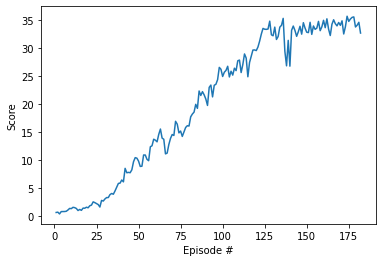

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

We can now go ahead and close the environment.

In [11]:
env.close()

#### 3. Ideas for Future Work

Having gone through Udacity's *Knowledge* portal, I see there are many things I can experiment with:

- Some people have gotten better performance with using a bigger buffer or minibatch size, different learning rates, and different architectures for the DNNs that correspond to the Actor and Critic.

- Other algorithms covered in the lecture like A3C, A2C, and GAE.

- Adapting the code to work with the Unity Crawler environment that involves not one, but four arms, working in tandem.